In [1]:
!pip install transformers torch Pillow


In [4]:
from google.colab import files
from transformers import BlipProcessor, BlipForConditionalGeneration
from PIL import Image
import torch
import io

# Load the BLIP model and processor from Hugging Face
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")

# Function to generate image description
def generate_description(image):
    # Preprocess the image for the model
    inputs = processor(images=image, return_tensors="pt")

    # Generate the description
    out = model.generate(**inputs)
    description = processor.decode(out[0], skip_special_tokens=True)

    return description



Saving gojo.jpeg to gojo.jpeg
Generated Description for gojo.jpeg:
a man sitting on a bench in front of a window


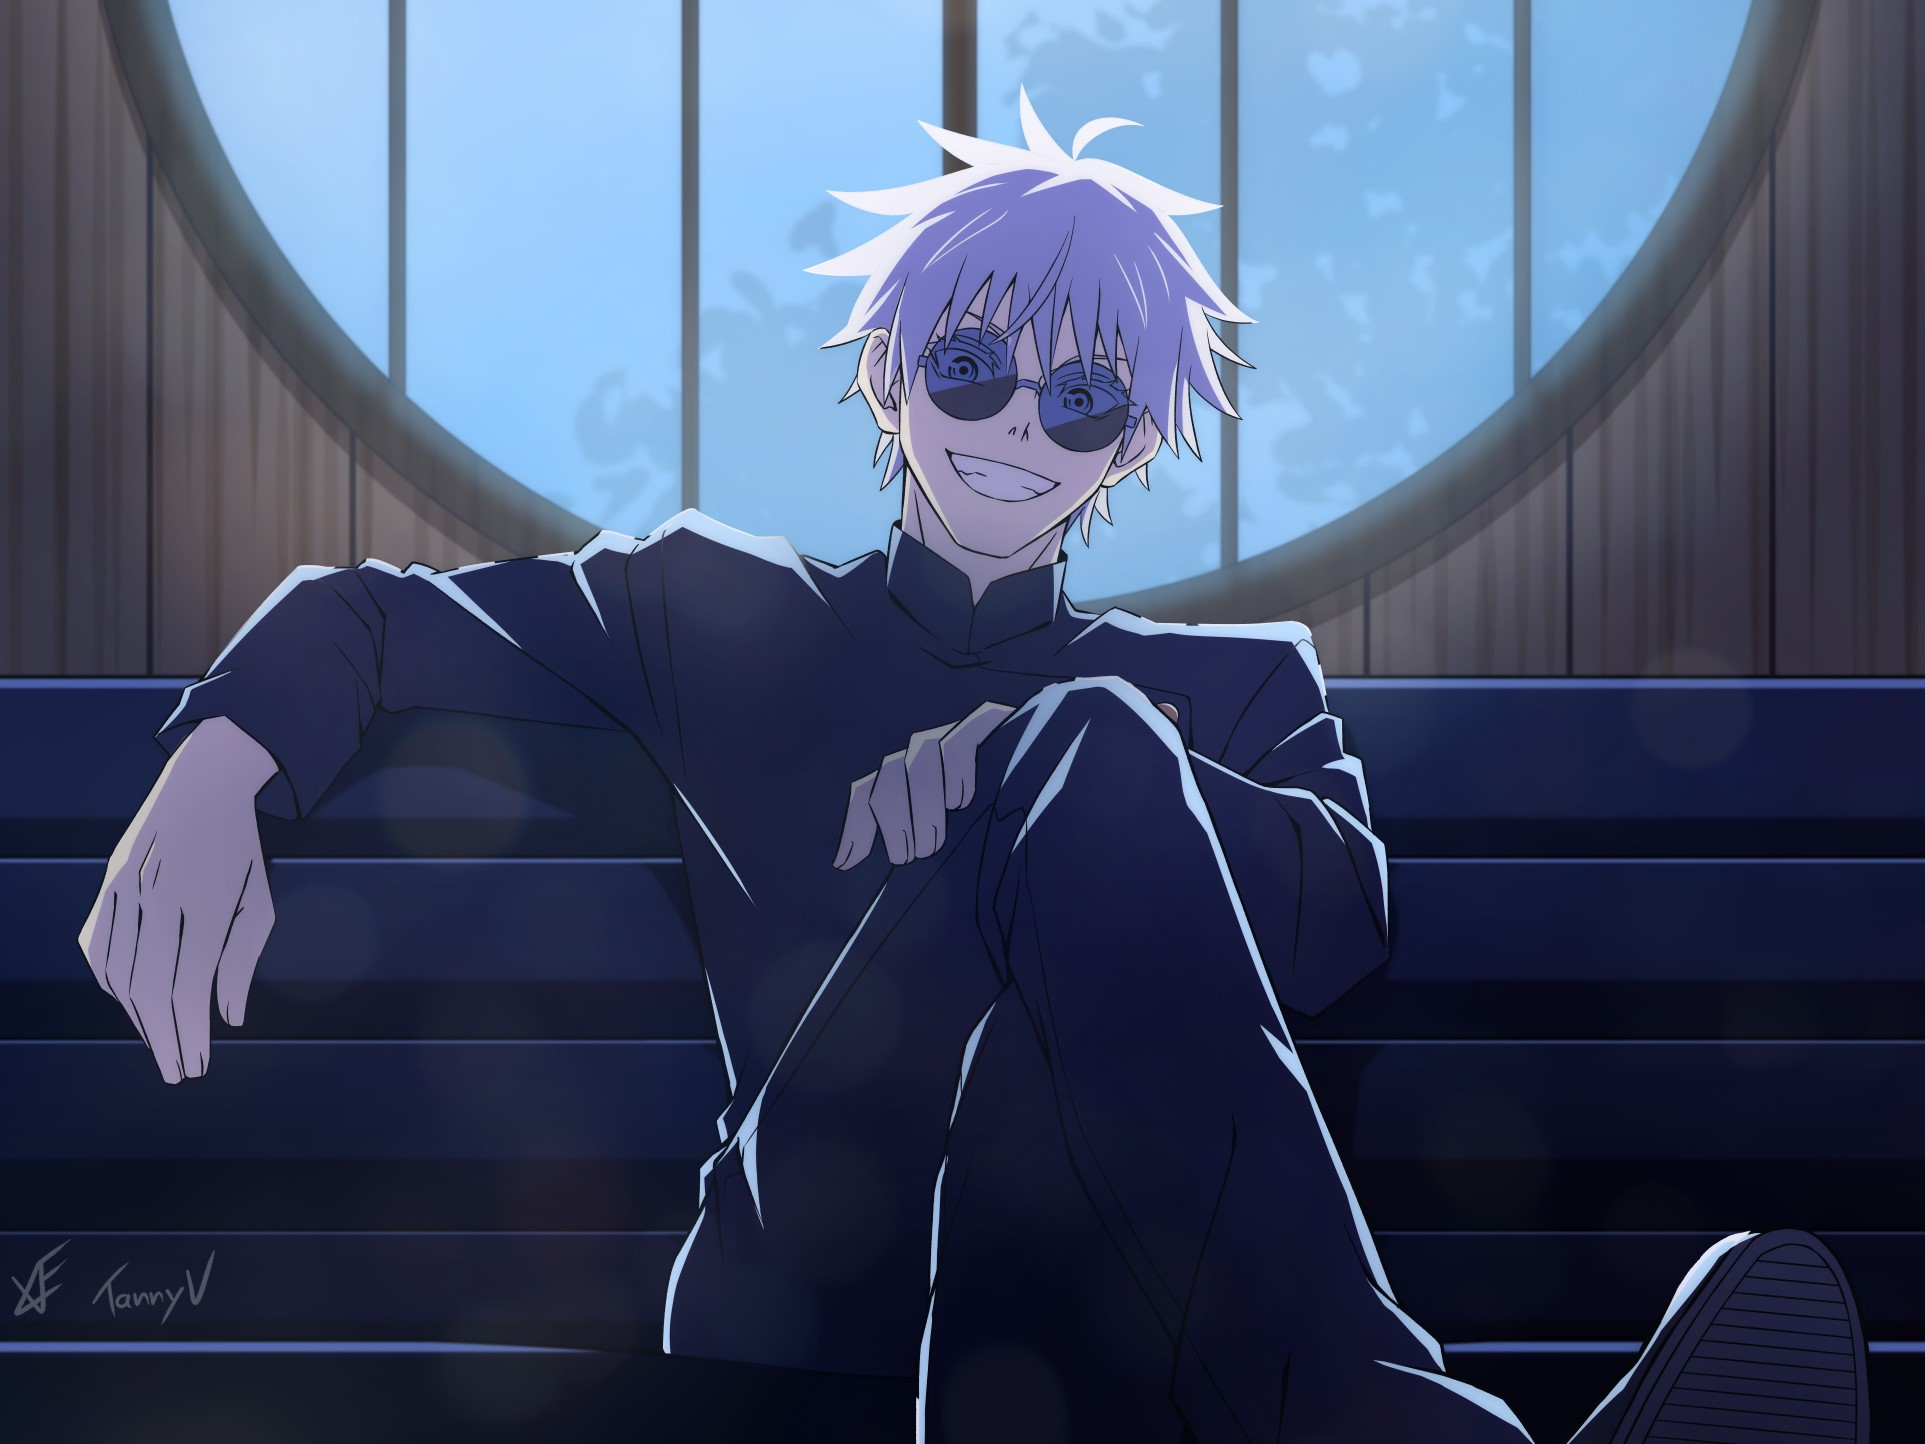

In [6]:
uploaded = files.upload()

for image_name in uploaded.keys():
    image = Image.open(image_name)
    description = generate_description(image)
    print(f"Generated Description for {image_name}:")
    print(description)
    display(image)





